# 2020.07.18 멘토멘티 복습
## 1) 문성민 과제
부족한 부분 중심 (함수 뜯기!!)

In [84]:
import pandas as pd
import numpy as np

In [85]:
# 1번
data = pd.DataFrame({'col1':['a','b','c','d','a','b','c','d'], 'col2':[2,3,4,6,1,1,2,3]})
data

,col1,col2
0,a,2
1,b,3
2,c,4
3,d,6
4,a,1
5,b,1
6,c,2
7,d,3


In [86]:
# 2번
data.groupby('col1').mean().reset_index()

,col1,col2
0,a,1.5
1,b,2.0
2,c,3.0
3,d,4.5


In [87]:
# 3번 : 칼럼 펼치기(get_dummies 함수)
pd.get_dummies(data, prefix='col1', drop_first=False)

,col2,col1_a,col1_b,col1_c,col1_d
0,2,1,0,0,0
1,3,0,1,0,0
2,4,0,0,1,0
3,6,0,0,0,1
4,1,1,0,0,0
5,1,0,1,0,0
6,2,0,0,1,0
7,3,0,0,0,1


### pd.get_dummies(
    data,: dataframe, array, series형태 
    prefix=None, : 펼칠 칼럼(원래 칼럼 이름을 앞에 써줌)
    prefix_sep='_', : 구분자
    dummy_na=False, : Nan값이 있을 때, nan값을 분류할 칼럼을 추가할것인가? 
    columns=None, : column name 설정
    sparse=False,
    drop_first=False,: dummy trap(기존 level에 해당되는 dummy까지 모형에 설명변수로 표현되는 경우. 원래 가변수는 하나 적게 생성하니까!)을 방지하기 위해 첫 칼럼을 드롭할것인가?
    dtype=None, : 데이터타입
) -> 인자로 'DataFrame' , 'array', 'series' 모두 받을 수 있음

In [88]:
# 4번
data.query('col1=="a"') # inplace=True 인자 가짐

,col1,col2
0,a,2
4,a,1


### query
- 조건식을 문자열로 입력받아 해당 조건에 만족하는 행을 추출해 출력.    
- 많은 행을 처리할 경우 이 방법이 [ ] 요 방법보다 훨씬 우월하다!
- @ : 환경변수 참조

In [89]:
# 5번 : map은 데이터프레임에서만 적용
data['col3'] = data['col1'].map({'a':0, 'b':1, 'c':2, 'd':3})
data

,col1,col2,col3
0,a,2,0
1,b,3,1
2,c,4,2
3,d,6,3
4,a,1,0
5,b,1,1
6,c,2,2
7,d,3,3


### lambda식 사용 + map과 apply
- lambda : def 함수의 선언과 처리를 한줄로 변환하는 식   
> ':'를 기준으로 입력인자(주로 x)와 호출 시 계산결과를 구분    
- lambda식을 이용할 때, 주로 **여러 입력 인자**를 사용해야할 경우 map, apply를 이용
> 단 map은 주로 1차원 array, apply는 주로 2차원 데이터프레임
- lambda 안에 if절을 넣을 수도 있는데, 단 : 오른쪽에 무조건 바로 **반환값**이 와야하므로, if식보다 **반환값**이 먼저 와야함!!! 그리고 else if 는 지원하지 않음. 


In [90]:
def get_square(a):
    return a**2
get_square(3)

9

In [91]:
lambda_square = lambda x:x**2 # 함수 식을 한줄로 반환한다!
lambda_square(3)

9

In [92]:
# 입력 인자가 여러개일때
a = [1,2,3]
square = map(lambda x : x**2, a)
list(square)

[1, 4, 9]

In [93]:
# 6번 
pd.pivot_table(data, values='col3', index='col2', columns='col1', 
               fill_value=0, margins=True)

col1,a,b,c,d,All
col2,,,,,
1,0,1,0,0,0.5
2,0,0,2,0,1.0
3,0,1,0,3,2.0
4,0,0,2,0,2.0
6,0,0,0,3,3.0
All,0,1,2,3,1.0


자자 여기서 중요한게뭘까? **aggfunc은 해당 col1, col2 기준으로 적용된다는 것**이다. 만약 mean이라면, **col1, col2의 원소의 개수**로 나눈다! 하지만 피봇테이블 안에 채워지는 value는 다를 수 있다. 여기서는 col3이 value로 설정되어있는데, abcd를 매핑했기때문에 안에 들어가는 요소는 다를 수 있다.

### pd.pivot_table(
    data, : dataframe
    values=None, : 집계할 값
    index=None, : 인덱스로 넣을 값
    columns=None, : columns로 넣을 값
    aggfunc='mean', : aggregation function 함수
    fill_value=None, : 결측 뭘로 채울건지?
    margins=False, : aggfunc 전체 행/열 적용!
    dropna=True, : 결측 제거 유무
    margins_name='All', : margins 열 이름 설정
    observed=False,
) -> 'DataFrame'에 적용

In [94]:
# ex) 공식 문서 pivot table
df = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
                         "bar", "bar", "bar", "bar"],
                   "B": ["one", "one", "one", "two", "two",
                         "one", "one", "two", "two"],
                   "C": ["small", "large", "large", "small",
                         "small", "large", "small", "small",
                         "large"],
                   "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
                   "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [95]:
table = pd.pivot_table(df, values='D', index=['A','B'], columns='C', 
                       aggfunc=sum, margins=True, fill_value=0)
table

C        large  small  All
A   B                     
bar one      4      5    9
    two      7      6   13
foo one      4      1    5
    two      0      6    6
All         15     18   33

In [96]:
table2 = pd.pivot_table(df, values='D', index=['A','B'], columns='C', 
                       aggfunc='mean', margins=True, fill_value=0)
table2

C        large  small       All
A   B                          
bar one   4.00    5.0  4.500000
    two   7.00    6.0  6.500000
foo one   2.00    1.0  1.666667
    two   0.00    3.0  3.000000
All       3.75    3.6  3.666667

> - **aggfunc** : element에 해당하는 값이 하나일 때는 그냥 고유값 그대로 셀에 채워지지만, 두개 이상이면 aggfunc적용되어서 채워짐.    
> - 그리고 margins=True 해서 나오는 All 셀에는, aggfunc이 모든 행/열에 적용되어서 나옴. 


In [97]:
# 여러 value의 집계 계산하기
# 단, margins=True 파라미터가 적용안될 수도 있음!
table3 = pd.pivot_table(df, values=['D','E'], index=['A','C'],  
                       aggfunc={'D':np.mean, 'E':[min, max, np.mean]})
table3

D    E               
               mean  max      mean  min
A   C                                  
bar large  5.500000  9.0  7.500000  6.0
    small  5.500000  9.0  8.500000  8.0
foo large  2.000000  5.0  4.500000  4.0
    small  2.333333  6.0  4.333333  2.0

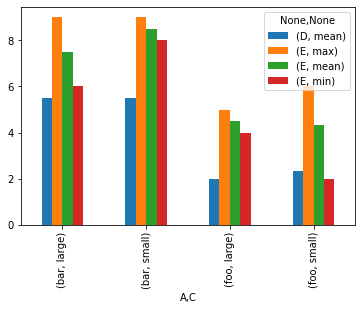

In [98]:
# pivot table 시각화
table3.plot(kind='bar')

범주형 변수 볼 때 갱장히 유용할거같다는 생각이 든다아

## 2) House price 데이터를 이용한 기본 코드

In [99]:
data = pd.read_csv('null_train.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062.0
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,NaN
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819.0
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711.0


### 1. query

In [100]:
a=7
data.query('grade==@a').head() # 변수 지정 쿼리문

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819.0
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711.0
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000.0
7,7,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697.0


In [101]:
a = [5,6,7] # grade에 a들어있는 열 출력
data.query('grade in @a').head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062.0
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819.0
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711.0
6,6,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000.0


### 2. interpolate 
pandas에서 지원하는 시계열 선형 보간법

In [102]:
# cf) 시계열 보간법 : interpolate
# 이상치에 민감하다. 
# 데이터가 주기성을 가질 때만 사용
# 리키지에 유의할것
# axis 에 따라 리키지 유의할 것 : axis=0(행에 주기성을 가질 때), axis=1(열이 주기성을 가질 때)
# test 데이터는 보간법으로 채울 때 axis=1은 주의해야함. (리키지발생. test는 우리가 모르는 미지의 영역)

data['sqft_lot15'].interpolate(methods='linear', axis=0).head()

0    5650.0
1    8062.0
2    7440.5
3    6819.0
4    9711.0
Name: sqft_lot15, dtype: float64

In [103]:
datestrs = ['12/1/2016', '12/03/2016', '12/04/2016', '12/10/2016']
dates = pd.to_datetime(datestrs)
ts = pd.Series([1, np.nan, np.nan, 10], index=dates)
ts

2016-12-01     1.0
2016-12-03     NaN
2016-12-04     NaN
2016-12-10    10.0
dtype: float64

In [104]:
ts_nonull = ts.interpolate() # 선형으로 비례해서 결측치를 채움. 
ts_nonull

2016-12-01     1.0
2016-12-03     4.0
2016-12-04     7.0
2016-12-10    10.0
dtype: float64

### 3. groupby

In [105]:
data.groupby(by='grade').mean()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
grade,,,,,,,,,,,,,,,,,,,
1,13522.000000,1.420000e+05,0.000000,0.000000,290.000000,20875.000000,1.000000,0.000000,0.000000,1.000000,290.000000,0.000000,1963.000000,0.000000,98024.000000,47.530800,-121.888000,1620.000000,22850.000000
3,3212.500000,2.710000e+05,1.000000,0.375000,560.000000,18741.000000,1.000000,0.000000,0.000000,3.500000,560.000000,0.000000,1935.000000,0.000000,98033.500000,47.369900,-121.872000,1165.000000,22549.000000
4,7703.260870,2.097413e+05,1.478261,0.923913,689.739130,25071.869565,1.043478,0.000000,0.086957,3.086957,681.043478,8.695652,1939.913043,0.000000,98071.391304,47.489300,-122.197913,1496.956522,22741.695652
5,7067.120690,2.510696e+05,2.367816,1.120690,966.683908,19163.333333,1.077586,0.011494,0.137931,3.511494,928.522989,38.160920,1936.132184,57.137931,98085.678161,47.502463,-122.203178,1378.137931,14462.050955
6,6811.379090,3.001554e+05,2.683499,1.242710,1194.129445,13498.742532,1.107397,0.006401,0.107397,3.554054,1064.550498,129.578947,1942.852774,89.167852,98103.502845,47.532718,-122.262691,1396.130868,11739.873725
7,7217.095055,4.015281e+05,3.249358,1.828396,1689.708735,11705.891458,1.302344,0.001766,0.098105,3.482338,1409.819204,279.889531,1963.731214,68.517341,98082.392742,47.555085,-122.233074,1679.205042,10503.012502
8,7847.159734,5.423156e+05,3.479201,2.346030,2185.657476,13370.360352,1.666984,0.006893,0.248158,3.354885,1871.746375,313.911101,1980.428571,87.888281,98073.185405,47.565890,-122.207923,2071.024008,11223.449709
9,8129.988679,7.734781e+05,3.774124,2.671429,2876.003774,21334.593531,1.855526,0.007547,0.420485,3.262534,2567.401078,308.602695,1988.368194,117.603774,98066.078706,47.574885,-122.165216,2617.169811,17134.958284
10,7939.115237,1.062482e+06,3.896287,2.983995,3514.915493,28687.074264,1.894366,0.023047,0.638924,3.233035,3108.423816,406.491677,1989.111396,89.697823,98061.060179,47.590565,-122.150378,3055.756722,20425.005731


In [107]:
data.groupby(by='grade')['price'].mean() # 특정 칼럼 보여주기

grade
1     1.420000e+05
3     2.710000e+05
4     2.097413e+05
5     2.510696e+05
6     3.001554e+05
7     4.015281e+05
8     5.423156e+05
9     7.734781e+05
10    1.062482e+06
11    1.522459e+06
12    2.220540e+06
13    4.132333e+06
Name: price, dtype: float64

In [108]:
data.groupby(by='grade')['price', 'bedrooms'].mean()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,price,bedrooms
grade,,
1,1.420000e+05,0.000000
3,2.710000e+05,1.000000
4,2.097413e+05,1.478261
5,2.510696e+05,2.367816
6,3.001554e+05,2.683499
7,4.015281e+05,3.249358
8,5.423156e+05,3.479201
9,7.734781e+05,3.774124
10,1.062482e+06,3.896287


In [109]:
data.groupby(by='grade')['price'].agg([max, min]) # 함수 두개 지정하기

,max,min
grade,,
1,142000.0,142000.0
3,280000.0,262000.0
4,435000.0,80000.0
5,795000.0,78000.0
6,1052000.0,84000.0
7,2050000.0,90000.0
8,2700000.0,140000.0
9,2546000.0,230000.0
10,3600000.0,316000.0


In [114]:
# agg로 칼럼명 + 함수 동시 지정하기 : 괄호 주의할것!
data.groupby(['grade', 'bedrooms'])['price'].agg([ ('평균', 'mean') ]).reset_index()

,grade,bedrooms,평균
0,1,0,1.420000e+05
1,3,1,2.710000e+05
2,4,0,2.650000e+05
3,4,1,2.109050e+05
4,4,2,2.041667e+05
...,...,...,...
66,12,7,2.280000e+06
67,12,8,3.300000e+06
68,13,4,2.082500e+06
69,13,5,3.810250e+06


### 4. merge, concat

In [117]:
# concat
data1 = data.drop(columns=['lat', 'long'])
data2 = data[['lat', 'long']]
pd.concat([data1, data2], axis=1).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,lat,long
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,1340,5650.0,47.5112,-122.257
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,2720,8062.0,47.7379,-122.233
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,1800,NaN,47.6168,-122.045
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,2238,6819.0,47.3097,-122.327
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,1650,9711.0,47.4095,-122.315


### pd.concat(
    Union, 
    axis=0, : 축 
    join='outer', : 조인 방법(inner : 중복된 요소를 중심으로 합침)
    ignore_index: False, : 중복되는 row 이름 무시여부
    keys=None, : 원본 데이터 이름 지정 
    levels=None,
    names=None,
    verify_integrity: bool = False,
    sort: bool = False,
    copy: bool = True,
)

In [119]:
f = data.groupby(['grade','bedrooms'])['price'].agg([('등급과 방 수를 고려한 price의 평균','mean')]).reset_index()
pd.merge(data,f,how='left',on = ['grade','bedrooms']).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,등급과 방 수를 고려한 price의 평균
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650.0,380623.761072
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062.0,299571.106087
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,NaN,519308.278468
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819.0,380623.761072
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711.0,380623.761072


### pd.merge(
    left,
    right, : 왼쪽, 오른쪽에 올 데이터셋 나열 
    how: str = 'inner', : inner join이 디폴트(중복되는 값 중심으로 합침)
    on=None, : 공통되는 열 이름
    left_on=None,
    right_on=None,
    left_index: bool = False,
    right_index: bool = False,
    sort: bool = False,
    suffixes=('_x', '_y'),
    copy: bool = True,
    indicator: bool = False,
    validate=None,
) 